In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

Using TensorFlow backend.


In [2]:
data=pd.read_csv("/Users/pavankumar/Desktop/reliance_data.csv")

In [3]:
data.shape

(6205, 15)

In [4]:
data.info()
# close column is object type, ned to be convert to float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6205 non-null   object 
 1   Symbol              6205 non-null   object 
 2   Series              6205 non-null   object 
 3   Prev Close          6205 non-null   float64
 4   Open                6205 non-null   float64
 5   High                6205 non-null   float64
 6   Low                 6205 non-null   float64
 7   Last                5657 non-null   float64
 8   Close               6205 non-null   float64
 9   VWAP                6205 non-null   float64
 10  Volume              6205 non-null   int64  
 11  Turnover            6205 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable Volume  4693 non-null   float64
 14  %Deliverble         4693 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 727.3

In [5]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [6]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
6200,23-11-2020,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083700e+15,497781.0,5148955.0,0.2461
6201,24-11-2020,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787040e+15,362587.0,3213843.0,0.2251
6202,25-11-2020,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965870e+15,356793.0,3040444.0,0.2019
6203,26-11-2020,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321310e+15,266412.0,3406506.0,0.2857
6204,27-11-2020,RELIANCE,EQ,1952.60,1940.50,1956.10,1921.40,1940.50,1929.80,1935.45,21845931,4.228160e+15,314085.0,12489338.0,0.5717


In [7]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


In [8]:
data.count()

Date                  6205
Symbol                6205
Series                6205
Prev Close            6205
Open                  6205
High                  6205
Low                   6205
Last                  5657
Close                 6205
VWAP                  6205
Volume                6205
Turnover              6205
Trades                2356
Deliverable Volume    4693
%Deliverble           4693
dtype: int64

In [9]:
#converting close column to numeric type and dropping null rows
data['Close']=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
#taking all rows of close column
train_data=data.iloc[:,4:5].values

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 3849 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2356 non-null   object 
 1   Symbol              2356 non-null   object 
 2   Series              2356 non-null   object 
 3   Prev Close          2356 non-null   float64
 4   Open                2356 non-null   float64
 5   High                2356 non-null   float64
 6   Low                 2356 non-null   float64
 7   Last                2356 non-null   float64
 8   Close               2356 non-null   float64
 9   VWAP                2356 non-null   float64
 10  Volume              2356 non-null   int64  
 11  Turnover            2356 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable Volume  2356 non-null   float64
 14  %Deliverble         2356 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 29

In [11]:
train_data

array([[ 952.  ],
       [ 936.55],
       [ 960.5 ],
       ...,
       [1980.  ],
       [1953.05],
       [1940.5 ]])

In [12]:
sc=MinMaxScaler(feature_range=(0,1))
train_data=sc.fit_transform(train_data)
train_data.shape

(2356, 1)

In [13]:
#preparing data for training
x_train=[]
y_train=[]
for i in range(5,2356):
    x_train.append(train_data[i-5:i,0])
    y_train.append(train_data[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [14]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) # adding the batch_size axis
x_train.shape

(2351, 5, 1)

In [15]:
model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error')

2023-10-16 12:03:35.930230: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-16 12:03:35.930669: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [16]:
# training our model with train_size=20 
hist=model.fit(x_train,y_train,epochs=20,batch_size=1,verbose=2)

Epoch 1/20
 - 149s - loss: 0.0042
Epoch 2/20
 - 246s - loss: 0.0033
Epoch 3/20
 - 241s - loss: 0.0026
Epoch 4/20
 - 268s - loss: 0.0021
Epoch 5/20
 - 271s - loss: 0.0020
Epoch 6/20
 - 240s - loss: 0.0019
Epoch 7/20
 - 256s - loss: 0.0017
Epoch 8/20
 - 244s - loss: 0.0015
Epoch 9/20
 - 248s - loss: 0.0014
Epoch 10/20
 - 254s - loss: 0.0014
Epoch 11/20
 - 262s - loss: 0.0015
Epoch 12/20
 - 247s - loss: 0.0011
Epoch 13/20
 - 250s - loss: 0.0013
Epoch 14/20
 - 210s - loss: 0.0013
Epoch 15/20
 - 259s - loss: 0.0012
Epoch 16/20
 - 238s - loss: 0.0014
Epoch 17/20
 - 215s - loss: 0.0012
Epoch 18/20
 - 240s - loss: 0.0013
Epoch 19/20
 - 251s - loss: 0.0012
Epoch 20/20
 - 247s - loss: 0.0010


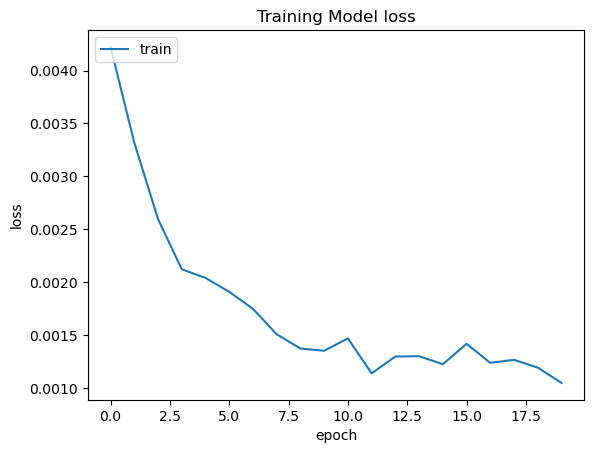

In [17]:
# visualizing the loss at each epoch
plt.plot(hist.history['loss'])
plt.title('Training Model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train'],loc='upper left')
plt.show()

In [18]:
# testing out model, using the test dataset
testdata=pd.read_csv("/Users/pavankumar/Desktop/reliance_data.csv")
testdata['close']=pd.to_numeric(testdata.Close,errors='coerce')
testdata=testdata.dropna()
testdata=testdata.iloc[:,4:5]
y_test=testdata.iloc[5:,0:].values
print(y_test)
inputclosing=testdata.iloc[:,0:].values
inputclosing_scaled=sc.transform(inputclosing)
print(inputclosing_scaled.shape)
x_test=[]
length=len(testdata)
timestep=5
for i in range(5,20):
    x_test.append(inputclosing_scaled[i-5:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

[[ 955.25]
 [ 947.5 ]
 [ 955.1 ]
 ...
 [1980.  ]
 [1953.05]
 [1940.5 ]]
(2356, 1)


(15, 5, 1)

In [20]:
y_pred=model.predict(x_test)

In [21]:
# to plot actual and predicted
predicted_price=sc.inverse_transform(y_pred)
print(predicted_price)

[[927.255  ]
 [925.18   ]
 [931.3822 ]
 [935.7228 ]
 [921.6226 ]
 [919.87964]
 [904.3973 ]
 [896.01556]
 [885.66785]
 [869.32684]
 [842.9464 ]
 [844.14496]
 [829.33105]
 [850.5184 ]
 [829.12244]]


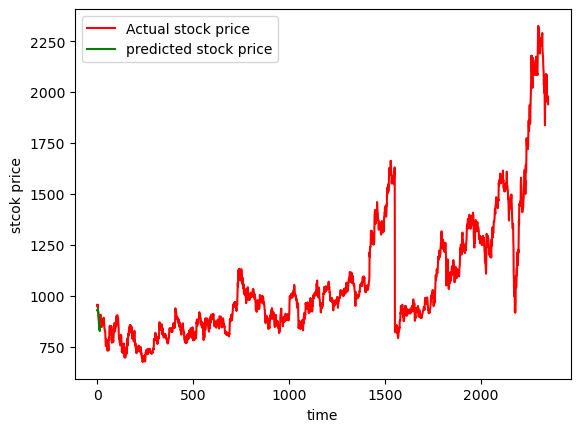

In [23]:
plt.plot(y_test,color='red')
plt.plot(predicted_price,color='green')
plt.xlabel('time')
plt.ylabel('stcok price')
plt.legend(['Actual stock price','predicted stock price'])
plt.show()